In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

In [2]:
def rotate_3d(alpha, beta, gamma):
    # Rotation matrices around x, y, z axes
    rot_x = np.array([[1, 0, 0],
                      [0, np.cos(alpha), -np.sin(alpha)],
                      [0, np.sin(alpha), np.cos(alpha)]])
    rot_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                      [0, 1, 0],
                      [-np.sin(beta), 0, np.cos(beta)]])
    rot_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                      [np.sin(gamma), np.cos(gamma), 0],
                      [0, 0, 1]])
    # Combine the rotations
    return rot_z.dot(rot_y).dot(rot_x)


def rotate_circle(circle, alpha, beta, gamma):
    rotation_matrix = rotate_3d(alpha, beta, gamma)
    return rotation_matrix.dot(circle.T).T


def rotate_vector(vector, alpha, beta, gamma):
    vector_col = np.array(vector).reshape(3, 1)
    rotation_matrix = rotate_3d(alpha, beta, gamma)
    rotated_vector_col = np.dot(rotation_matrix, vector_col)
    return rotated_vector_col.flatten()


def minor_angle_between_vectors(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)

    cos_theta = dot_product / (norm_vector1 * norm_vector2)
    # Ensure cos_theta is within [-1, 1] range
    cos_theta = min(1, max(cos_theta, -1))  

    angle = np.arccos(cos_theta)
    return angle

In [3]:
class Circle():
    # create a circle with specified radius and center 
    def __init__(self, radius, center, sample_size=500):
        self.radius = radius
        self.center = np.array(center)
        self.sample_size = sample_size
        self.theta = np.linspace(0, 2*np.pi, self.sample_size)
        self.x = self.center[0] + self.radius*np.cos(self.theta)
        self.y = self.center[1] + self.radius*np.sin(self.theta)
        self.z = self.center[2] + np.zeros_like(self.theta)
        self.vectors = np.column_stack([self.x, self.y, self.z])
        # self.y_as_function_of_x = lambda x: self.center[1] + np.sqrt(self.radius**2 - (x - self.center[0])**2)

In [4]:
def get_circle_from_vectors(v1, v2, sample_size=1000):

    v1_mode = np.linalg.norm(v1)
    v1_norm = v1/v1_mode
    
    proj_len = np.dot(v2, v1) / v1_mode
    # print(proj_len)
    minor_angle = minor_angle_between_vectors(v1, v2)
    # print(minor_angle)
    
    radius = np.tan(minor_angle)*proj_len
    center = proj_len*v1_norm
    # print(radius)
    # print(center)
    # print('---')
    return Circle(radius, center, sample_size=sample_size)


def calculate_angle_spectrum(arr1, arr2):
    angle_spectrum = []
    for k in arr1:
        for i in arr2:
            angle_spectrum.append(minor_angle_between_vectors(k, i))
    return np.array(angle_spectrum)


def minor_angle_hist(spec_lst, label_lst, bins=100, norm=True, angle_unit='radians'):
    plt.figure()
    for spec, lab in zip(spec_lst, label_lst):
        hist, bin_edges = np.histogram(spec, bins=bins, density=True)
        bins_center = (bin_edges[:-1] + bin_edges[1:]) / 2
        if norm:
            hist = hist / sum(hist)

        plt.plot(bins_center, hist, label=lab)

    plt.xlabel(f'Angles {angle_unit}')
    plt.ylabel('Probability')
    plt.legend()


def generate_random_orientations(cnt=1):
    NV_init = np.array([0, 0, 1])
    if cnt == 1:
        alpha, beta, gamma = np.random.uniform(0, 2*np.pi, 3)
        return rotate_vector(NV_init, alpha, beta, gamma)
    else:
        ret = []
        while(cnt>0):
            alpha, beta, gamma = np.random.uniform(0, 2*np.pi, 3)
            ret.append(rotate_vector(NV_init, alpha, beta, gamma))
            cnt-=1
        return ret


def generate_random_unit_vector():
    # Step 1: Generate three random numbers
    random_numbers = np.random.normal(size=3)

    # Step 2: Normalize the random numbers to obtain a unit vector
    unit_vector = random_numbers / np.linalg.norm(random_numbers)

    return unit_vector

In [5]:
def common_elements_with_error(list_of_lists, error_bound=1e-6):
    if not list_of_lists:
        return []

    # Convert each sublist to a set of tuples, rounding each element to the specified error bound
    rounded_sets = [set((round(elem, -int(math.log10(error_bound))),) for elem in sublist) for sublist in list_of_lists]

    # Find the intersection of all sets
    common_set = set.intersection(*rounded_sets)

    # Convert the result back to a list
    common_list = [elem[0] for elem in common_set]

    return common_list


def plot_dual_axis(x_values, y1_values, y2_values, y1_label, y2_label, title=None):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Rotation number')
    ax1.set_ylabel(y1_label, color=color)
    ax1.plot(x_values, y1_values, color=color, linestyle='--', marker='o')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2_label, color=color)
    ax2.plot(x_values, y2_values, color=color, linestyle='--', marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    if title is not None:
        plt.title(title)
    
    fig.tight_layout()
    plt.show()

In [10]:
# magnetic field
B = np.array([0, 0, 1])

NV1_multi, NV2_multi = generate_random_orientations(cnt=2)

print(f'NV1: {NV1_multi}')
print(f'NV2: {NV2_multi}')

inter_angle = minor_angle_between_vectors(NV1_multi, NV2_multi)
print(f'Angle between NV1 and NV2: {inter_angle}')

NV1: [0.66018208 0.01629856 0.75092875]
NV2: [ 0.60247187  0.30913531 -0.7358417 ]
Angle between NV1 and NV2: 1.7211472373985854


In [18]:
sample_size = 1000
circ_NV1_multi = get_circle_from_vectors(B, NV1_multi, sample_size=sample_size)
circ_NV2_multi = get_circle_from_vectors(B, NV2_multi, sample_size=sample_size)

In [19]:
batch_size = 1
rot_cnt = 10

overlap_mean_meta = []
overlap_var_meta = []
angle_spec_meta = []
overlap_meta = []

repeat_iteration = False

for k in range(batch_size):
    print(f'------------Run {k+1}------------')
    angle_spec_lst_multi = []
    overlap_mean_lst = []
    overlap_var_lst = []
    overlap_lst = []
    
    for i in range(rot_cnt):
        print(f'Rotation {i+1}')
        repeat_iteration = True
        
        while repeat_iteration:
            # Generate random rotation angles
            cur_rand_angles = np.random.uniform(0, 2*np.pi, 3)
    
            # Rotate the NV vectors
            NV1_multi = rotate_vector(NV1_multi, cur_rand_angles[0], cur_rand_angles[1], cur_rand_angles[2])
            NV2_multi = rotate_vector(NV2_multi, cur_rand_angles[0], cur_rand_angles[1], cur_rand_angles[2])
    
            # Get the circles
            circ_NV1_multi = get_circle_from_vectors(B, NV1_multi, sample_size=500)
            circ_NV2_multi = get_circle_from_vectors(B, NV2_multi, sample_size=500)

            ### ------------- FOR 2 NV CASE -----------------
            angle_spec = calculate_angle_spectrum([circ_NV1_multi.vectors[0]], circ_NV2_multi.vectors)

            if len(angle_spec) == 0:
                continue
            
            # print(f'Got minor angle spectrum with length {len(angle_spec)}')

            angle_spec_lst_multi.append(angle_spec)
        
            cur_overlap = common_elements_with_error(angle_spec_lst_multi, error_bound=0.01)
            overlap_lst.append(cur_overlap)
            overlap_mean_lst.append(np.mean(cur_overlap))
            overlap_var_lst.append(np.var(cur_overlap))

            repeat_iteration = False

    angle_spec_meta.append(angle_spec_lst_multi)
    overlap_meta.append(overlap_lst)
    overlap_mean_meta.append(overlap_mean_lst)
    overlap_var_meta.append(overlap_var_lst)

------------Run 1------------
Rotation 1
Rotation 2
Rotation 3
Rotation 4
Rotation 5
Rotation 6
Rotation 7
Rotation 8
Rotation 9
Rotation 10


In [23]:
angle_spec_deg = []
for arr in angle_spec_meta[0]:
    angle_spec_deg.append(arr * (360 / (2*np.pi)))

In [58]:
print(f'Angle between NV1 and NV2 (radians): {inter_angle}')
print(f'Angle between NV1 and NV2 (degrees): {inter_angle * (360 / (2*np.pi))}')

Angle between NV1 and NV2 (radians): 1.7211472373985854
Angle between NV1 and NV2 (degrees): 98.61447262354011


In [64]:
plot_up_to_rotation = 8
(overlap_mean_meta[0][plot_up_to_rotation-2]) * (360 / (2*np.pi))

98.83521966006701

In [65]:
cur_overlap_deg = np.array(overlap_meta[0][plot_up_to_rotation-2]) * (360 / (2*np.pi))
print(f'overlap_min:{min(cur_overlap_deg)}')
print(f'overlap_max:{max(cur_overlap_deg)}')

overlap_min:98.5487407625016
overlap_max:99.12169855763241


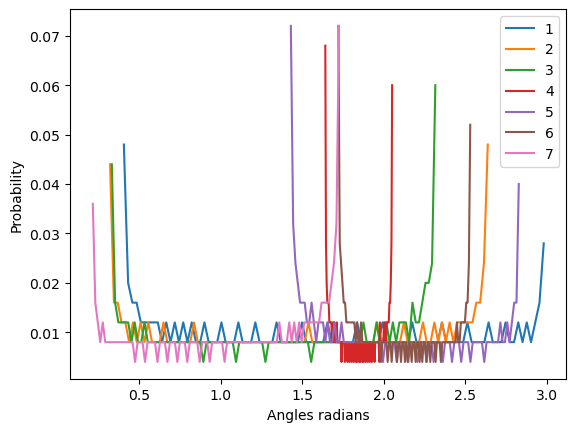

In [66]:
minor_angle_hist(angle_spec_meta[0][:plot_up_to_rotation], range(1, plot_up_to_rotation))

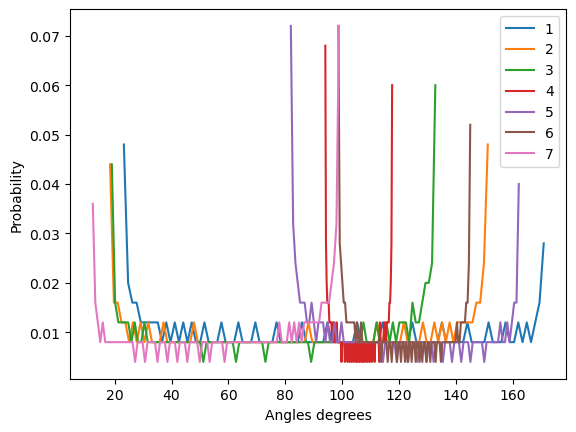

In [67]:
# plot_up_to_rotation = 2
minor_angle_hist(angle_spec_deg[:plot_up_to_rotation], range(1, plot_up_to_rotation), angle_unit='degrees')